In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
import gzip

In [2]:
def parse(path):
  g = gzip.open(path, 'rt', encoding='utf-8')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

review_data = getDF('Data/Gift_Cards_5.json.gz')

In [3]:
review_data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4.0,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5.0,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5.0,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5.0,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5.0,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN
2968,4.0,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN
2969,5.0,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift,1528416000,NaN,NaN
2970,5.0,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN


In [4]:
review_data.drop(['reviewTime', 'verified','style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image'], axis=1,inplace=True)
review_data

,overall,reviewerID,asin
0,5.0,A31UBHTUUIFJUT,B004LLIKVU
1,4.0,A2MN5JQMIY0FQ2,B004LLIKVU
2,5.0,A25POI5IGGENPM,B004LLIKVU
3,5.0,A2HYGTHB4LJ9FW,B004LLIKVU
4,5.0,ACDG3M94UMZGJ,B004LLIKVU
...,...,...,...
2967,5.0,A1MXZ1CW0ZVTKL,B01DWOZKSC
2968,4.0,A1SVYJFIASQ46Z,B01DWOZKSC
2969,5.0,A1QZ08NSDCZBA3,B01E4QS95I
2970,5.0,A1L4GG3FBMIG6V,B01FERR9FW


In [5]:
review_data.dtypes

overall       float64
reviewerID     object
asin           object
dtype: object

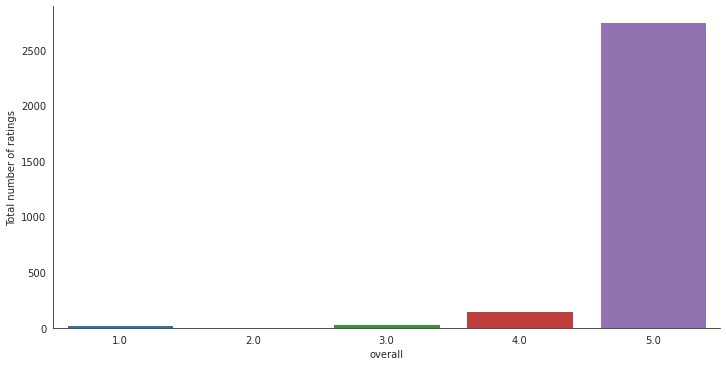

In [6]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=review_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
    

In [7]:
stars = review_data['overall'].value_counts(sort=True)
stars

5.0    2752
4.0     154
3.0      33
1.0      22
2.0      11
Name: overall, dtype: int64